# Natural Language Processing (NLP) 
is about getting a computer to make sense of language.

<img src="NLP-image.jpg" width=400 height=400 />

With NLP, a computer is able to listen to language spoken by a person and respond. It is also able to take the large amount of information present on the web: in emails, news articles, social media texts, customer reviews, and process it, draw useful information from its contents, so we can then act on it. Various processes are getting automated due to advances in NLP. Examples include spam detection, digital assistants, search engines, language translation, sentiment analysis, recommendation systems that suggest videos, movies, books, music for you. 

Here are a few of the things we will learn how to do in this module:

1. Import the regular expressions module and use it to find a pattern or sequence of characters in a document. 

2. Import and use the Natural Language Toolkit Library nltk to tokenize text.

3. Make a histogram of word lengths or number of words per line/sentence within the text. 

4. Remove stop words (the common words, that occur too frequently), lemmatize words (change to the root word)

5. Make a lexical dispersion plot, find texts that have greater lexical diversity (ie use more diverse vocabulary) 

6. Named entity recognition, whereby the computer recognizes each word as being a person, place, number etc.

7. Recognizing sentiment 

8. These steps pave the way for machine learning to be used within NLP. The complexity of human language requires smart algorithms and self-teaching systems to understand language input and respond appropriately. Would you like to see how a recommendation engine is built and build your own? Would you like to learn how to scrape the web for information you are looking for. 

In [28]:
my_string="Let's learn how to split a paragraph into sentences! Won't that be fun? Let's take 2 or 3 sentences and write code to make sense of them. You've got this. You can find out more at www.nltk.org #nltk 😀" 

<img src="nlp-regex.png" width=400 height=400 />

In [29]:
import re
# find all words 
re.findall(r"\w+", my_string)

['Let',
 's',
 'learn',
 'how',
 'to',
 'split',
 'a',
 'paragraph',
 'into',
 'sentences',
 'Won',
 't',
 'that',
 'be',
 'fun',
 'Let',
 's',
 'take',
 '2',
 'or',
 '3',
 'sentences',
 'and',
 'write',
 'code',
 'to',
 'make',
 'sense',
 'of',
 'them',
 'You',
 've',
 'got',
 'this',
 'You',
 'can',
 'find',
 'out',
 'more',
 'at',
 'www',
 'nltk',
 'org',
 'nltk']

\s stands for a space, \S stands for anything but a space, + stands for 1 or more times, () captures a group, [] says one or more of the characters within. Find out more at https://www.rexegg.com/regex-quickstart.html

In [58]:
re.findall(r"[a-zA-Z']+", my_string)

["Let's",
 'learn',
 'how',
 'to',
 'split',
 'a',
 'paragraph',
 'into',
 'sentences',
 "Won't",
 'that',
 'be',
 'fun',
 "Let's",
 'take',
 'some',
 'sentences',
 'and',
 'write',
 'code',
 'to',
 'make',
 'sense',
 'of',
 'them',
 "You've",
 'got',
 'this',
 'You',
 'can',
 'find',
 'out',
 'more',
 'at',
 'nltk',
 'org']

In [ ]:
re.findall(r"\w+'+\w+", my_string)

In [102]:
re.findall(r'www.\S+', my_string)                       

['www.nltk.org']

In [101]:
re.findall(r'(www.\w+.\w+)', my_string)       

['www.nltk.org']

In [ ]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[\.\?\!]"
# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

In [ ]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

In [ ]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

In [ ]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

The Natural Language Toolkit Library nltk is often used to tokenize ie break up a document 
into smaller chunks according to some rules. It has functions word_tokenize (which also 
tokenizes punctuation), sent_tokenize, regexp_tokenize and Tweettokenize. NLTK comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: http://nltk.org/nltk_data/
 
install and import nltk, see nltk.org
import nltk
nltk.download()

Test of installation
from nltk.corpus import brown
brown.words()


In [77]:
# Import necessary modules
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer
sentences=sent_tokenize(my_string)

In [31]:
print(sentences[0])

Let's learn how to split a paragraph into sentences!


In [37]:
tknzr = TweetTokenizer()
tweet_tokens = tknzr.tokenize(my_string)
print(tweet_tokens)

["Let's", 'learn', 'how', 'to', 'split', 'a', 'paragraph', 'into', 'sentences', '!', "Won't", 'that', 'be', 'fun', '?', "Let's", 'take', '2', 'or', '3', 'sentences', 'and', 'write', 'code', 'to', 'make', 'sense', 'of', 'them', '.', "You've", 'got', 'this', '.', 'You', 'can', 'find', 'out', 'more', 'at', 'www.nltk.org', '#nltk', '😀']


In [42]:
# Tokenize and print only emoji
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
print(regexp_tokenize(my_string, emoji_pattern))

['😀']


In [45]:
my_string=re.sub(emoji_pattern, '', string=my_string)

In [46]:
# Because word_tokenize splits up apostrophied words, you have to use ingenious methods to achieve what you need
all_words=regexp_tokenize(my_string, pattern="\s+", gaps=True)
print(all_words)

["Let's", 'learn', 'how', 'to', 'split', 'a', 'paragraph', 'into', 'sentences!', "Won't", 'that', 'be', 'fun?', "Let's", 'take', '2', 'or', '3', 'sentences', 'and', 'write', 'code', 'to', 'make', 'sense', 'of', 'them.', "You've", 'got', 'this.', 'You', 'can', 'find', 'out', 'more', 'at', 'www.nltk.org', '#nltk']


In [47]:
all_words=regexp_tokenize(my_string, pattern="\s+|\.|\!|\?|\d+|\#", gaps=True)
print(all_words)

["Let's", 'learn', 'how', 'to', 'split', 'a', 'paragraph', 'into', 'sentences', "Won't", 'that', 'be', 'fun', "Let's", 'take', 'or', 'sentences', 'and', 'write', 'code', 'to', 'make', 'sense', 'of', 'them', "You've", 'got', 'this', 'You', 'can', 'find', 'out', 'more', 'at', 'www', 'nltk', 'org', 'nltk']


In [48]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(all_words)

# Print the unique tokens result
print(unique_tokens)

{'to', 'code', 'that', 'make', 'find', 'nltk', 'at', 'or', 'You', 'write', 'take', "You've", 'got', 'out', 'how', 'of', "Let's", 'into', 'www', 'paragraph', 'can', 'this', 'sense', 'and', 'be', 'org', 'a', 'sentences', 'fun', 'more', "Won't", 'them', 'split', 'learn'}


In [49]:
# Search for the first occurrence of a word in your string using match
#unique_tokens_sentence=" ".join(unique_tokens)
match = re.search("code", my_string)

# Print the start and end indexes of match
print(match.start(), match.end())

110 114


Text(0.5, 1.0, 'Histogram of word lengths')

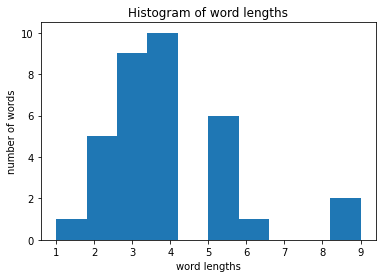

In [51]:
# a list comprehension takes a list (all_words) and uses it to make a new list (word_lengths) 
from matplotlib import pyplot as plt
word_lengths=[len(w) for w in unique_tokens]
plt.hist(word_lengths)
plt.xlabel("word lengths")
plt.ylabel('number of words')
plt.title('Histogram of word lengths')

In [52]:
print(word_lengths)

[2, 4, 4, 4, 4, 4, 2, 2, 3, 5, 4, 6, 3, 3, 3, 2, 5, 4, 3, 9, 3, 4, 5, 3, 2, 3, 1, 9, 3, 4, 5, 4, 5, 5]


[["Let's", 'learn', 'how', 'to', 'split', 'a', 'paragraph', 'into', 'sentences', '!'], ["Won't", 'that', 'be', 'fun', '?'], ["Let's", 'take', '2', 'or', '3', 'sentences', 'and', 'write', 'code', 'to', 'make', 'sense', 'of', 'them', '.'], ["You've", 'got', 'this', '.'], ['You', 'can', 'find', 'out', 'more', 'at', 'www.nltk.org', '#nltk', '😀']]


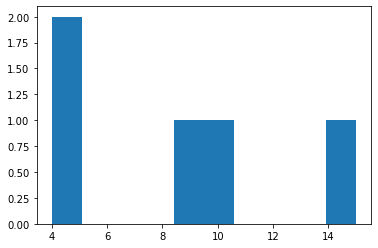

In [61]:
# Try using your new skills to find and chart the number of words per line

# Tokenize each line: tokenized_lines
#tokenized_lines = [regexp_tokenize(s, "\s+|\.|\!|\?|\d+|\#", gaps=True) for s in sentences]
tokenized_lines = [tknzr.tokenize(s) for s in sentences]
print(tokenized_lines)

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [65]:
from collections import Counter
from nltk.corpus import stopwords

In [63]:
# Counter is a dictionary with word:word_frequency as key: value entries
Counter(unique_tokens).most_common(5)
# most_common(2) returns 5 tuples (most common word, frequency) 

[('to', 1), ('code', 1), ('that', 1), ('make', 1), ('find', 1)]

In [ ]:
# Stop Words are commonly used words (such as “the”, “a”, “an”, “in”) that we might want to ignore while processing textual information
print(stopwords.words('english'))

In [66]:
tokens=[t for t in unique_tokens if t not in stopwords.words('english')]

In [67]:
print(tokens)

['code', 'make', 'find', 'nltk', 'You', 'write', 'take', "You've", 'got', "Let's", 'www', 'paragraph', 'sense', 'org', 'sentences', 'fun', "Won't", 'split', 'learn']


In [68]:
# In english words are modified to indicate tense, plurality etc. Lemmatization reduces the word to its root word. 
# Instantiate the WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
# Lemmatize all tokens into a new list: lemmatized
tokens = [wordnet_lemmatizer.lemmatize(t) for t in unique_tokens]
print(tokens)
# mostly plurals are reduced to singular

['to', 'code', 'that', 'make', 'find', 'nltk', 'at', 'or', 'You', 'write', 'take', "You've", 'got', 'out', 'how', 'of', "Let's", 'into', 'www', 'paragraph', 'can', 'this', 'sense', 'and', 'be', 'org', 'a', 'sentence', 'fun', 'more', "Won't", 'them', 'split', 'learn']


In [69]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


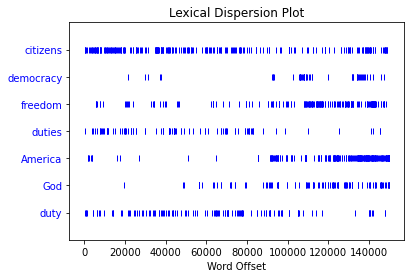

In [70]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America", "God", "duty"])
# US presidential speeches involve more of the words God and freedom and less of duty and citizens

In [90]:
V=set(text2)

In [95]:
sorted(V)

['abandoned',
 'abatement',
 'abbeyland',
 'abhor',
 'abhorred',
 'abhorrence',
 'ability',
 'able',
 'ablest',
 'abode',
 'abominably',
 'abounded',
 'abridge',
 'abridgement',
 'abroad',
 'abruptly',
 'abruptness',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'abstracted',
 'abstraction',
 'abstruse',
 'absurd',
 'absurdity',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'acacia',
 'accelerate',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'accident',
 'accidental',
 'accidentally',
 'accidently',
 'accommodate',
 'accommodating',
 'accommodation',
 'accompanied',
 'accompany',
 'accomplished',
 'accomplishment',
 'accordant',
 'according',
 'accordingly',
 'accosted',
 'account',
 'accounted',
 'accrue',
 'accurately',
 'accusation',
 'accuse',
 'accustom',
 'accustomary',
 'ache',
 'aching',
 'acknowledge',
 'acknowledged',
 'acknowledging',
 'acknowledgment',
 'acquaintance',
 'acquainted',
 'acquiesced',
 'acquiescence

In [91]:
#words=word_tokenize(V)
words = [t.lower() for t in V if t.isalpha()]
words=[t for t in words if t not in stopwords.words('english')]
words = [wordnet_lemmatizer.lemmatize(t) for t in words]

V = set(words)
#sorted(V)
long_words = [w for w in V if len(w) > 9]
sorted(long_words)

['abhorrence',
 'abominably',
 'abridgement',
 'abruptness',
 'absolutely',
 'abstracted',
 'abstraction',
 'abundantly',
 'accelerate',
 'acceptable',
 'acceptably',
 'acceptance',
 'accidental',
 'accidentally',
 'accidently',
 'accommodate',
 'accommodating',
 'accommodation',
 'accompanied',
 'accomplished',
 'accomplishment',
 'accordingly',
 'accurately',
 'accusation',
 'accustomary',
 'acknowledge',
 'acknowledged',
 'acknowledging',
 'acknowledgment',
 'acquaintance',
 'acquainted',
 'acquiesced',
 'acquiescence',
 'acquisition',
 'acquitting',
 'additional',
 'addressing',
 'administer',
 'administering',
 'admiration',
 'admittance',
 'advancement',
 'advantageous',
 'affability',
 'affectation',
 'affectedly',
 'affectionate',
 'affectionately',
 'affirmative',
 'afflicting',
 'affliction',
 'affronting',
 'afterwards',
 'aggrandizement',
 'aggravation',
 'alleviation',
 'alteration',
 'alternately',
 'alternative',
 'altogether',
 'annihilation',
 'announcing',
 'answerabl

In [88]:
words_1=[t for t in words if len(t)==1]
sorted(words_1)

['c', 'f', 'l', 'p', 'u', 'u', 'w']

In [93]:
text2.concordance("w")

Displaying 1 of 1 matches:
 thought she could distinguish a large W in the direction ; and no sooner was i


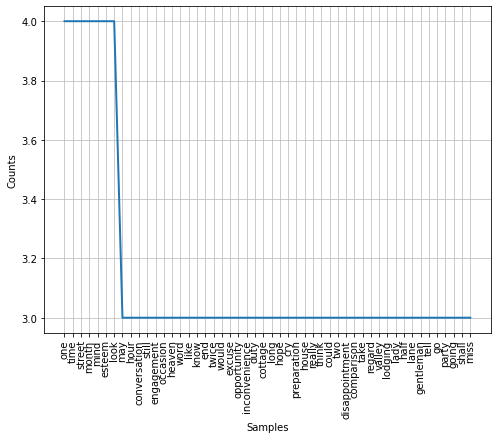

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [137]:
import seaborn as sns
fd = nltk.FreqDist(words)
fd.most_common(50)
plt.figure(figsize=(8, 6))
fd.plot(50,cumulative=False)


fdist = FreqDist(len(w) for w in words) 
# fdist is a dictionary containing length of word: freq
# it will tell us the most common wordlengths in the text, giving a frequency distribution of diff word lengths
fdist

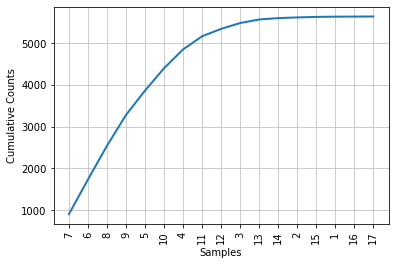

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [101]:
fdist.plot(50, cumulative=True)

In [120]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [97]:
lexical_diversity(text2)

0.04826383002768831

In [103]:
words_7 = [w for w in words if len(w) ==7]
sorted(words_7)

['ability',
 'abridge',
 'absence',
 'account',
 'acutely',
 'adapted',
 'address',
 'admired',
 'admirer',
 'admires',
 'adopted',
 'adorned',
 'advance',
 'advised',
 'affable',
 'affixed',
 'afflict',
 'affront',
 'agitate',
 'ailment',
 'alarmed',
 'alleged',
 'allowed',
 'alluded',
 'already',
 'altered',
 'amazing',
 'amended',
 'amiable',
 'amiably',
 'amongst',
 'amusing',
 'ancient',
 'angrily',
 'anguish',
 'annexed',
 'annuity',
 'another',
 'anxiety',
 'anxious',
 'anybody',
 'anymore',
 'apology',
 'applied',
 'approve',
 'apricot',
 'arrival',
 'arrived',
 'arrives',
 'article',
 'artless',
 'ashamed',
 'assuage',
 'assured',
 'asunder',
 'atoning',
 'attempt',
 'attract',
 'audible',
 'auditor',
 'augment',
 'availed',
 'avarice',
 'avignon',
 'avoided',
 'awaited',
 'awaking',
 'awkward',
 'badness',
 'bargain',
 'bashful',
 'bearing',
 'bedroom',
 'befalls',
 'begging',
 'behaved',
 'believe',
 'belongs',
 'beloved',
 'beneath',
 'benefit',
 'bequest',
 'besides',
 'be

In [123]:
lexical_diversity(words)

0.8756211180124224

In [105]:
# a collection of 55 texts, one for each presidential address
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

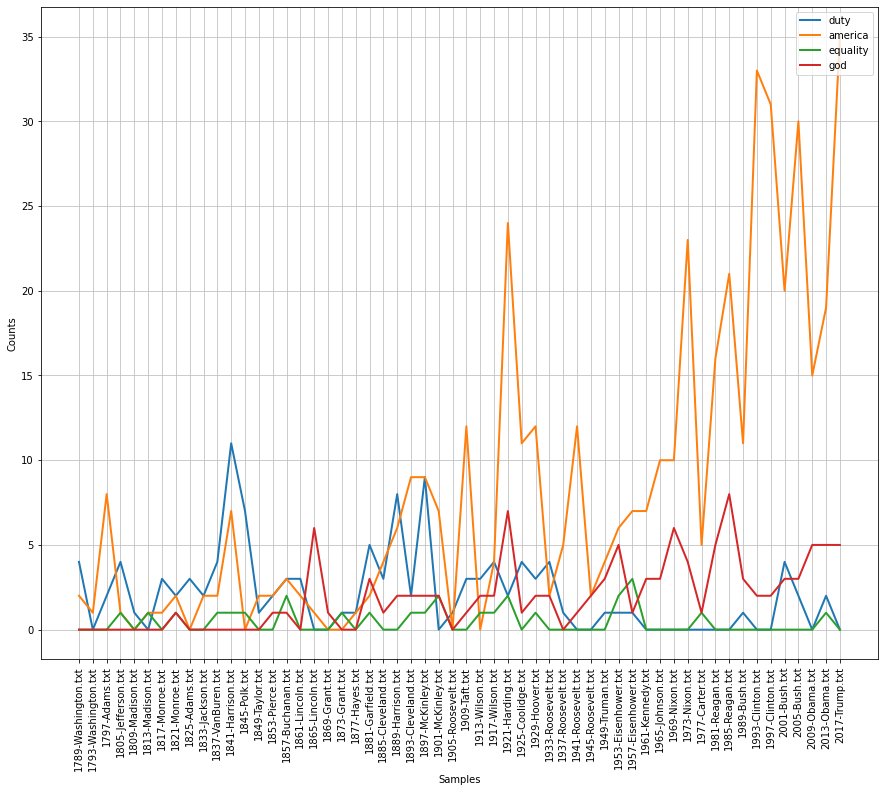

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
# In a set of documents, how frequently does a word appear conditional on something: could be length of word but here it is.. 
cfd = nltk.ConditionalFreqDist((target, fileid)
            for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
            for target in ['america', 'equality', 'duty', 'god']
            if w.lower().startswith(target))
plt.figure(figsize=(15, 12))
cfd.plot()

In [133]:
# Named entity recognition
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")

# Create a new document: doc
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
doc = nlp(ex)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

NORP European
ORG Google
MONEY $5.1 billion
DATE Wednesday


European is NORD (nationalities or religious or political groups), Google is an organization, $5.1 billion is monetary value and Wednesday is a date object. They are all correct.

Textblob is a python library for performing common NLP (Natural Language Processing) tasks, including sentiment analysis. Within it's sentiment property it returns polarity which is a number between -1, implying most negative, to +1 (most positive) sentiment, and a subjectivity score from 0 (fully objective) to 1 (fully subjective). Lets try it out.

In [ ]:
from textblob import TextBlob

test_sentence='I have had a good day'
blob_test_sentence=TextBlob(test_sentence)
print(blob_test_sentence.sentiment)

In [ ]:
test_sentence='I have had an awful day'
blob_test_sentence=TextBlob(test_sentence)
print(blob_test_sentence.sentiment)

In [ ]:
test_sentence='This is a tree'
blob_test_sentence=TextBlob(test_sentence)
print(blob_test_sentence.sentiment)

In [ ]:
two_cities='It was the best of times, it was the worst of times,'\
'it was the age of wisdom, it was the age of foolishness, '\
'it was the epoch of belief, it was the epoch of incredulity, '\
'it was the season of Light, it was the season of Darkness, '\
'it was the spring of hope, it was the winter of despair, '\
'we had everything before us, we had nothing before us,'\
'we were all going direct to Heaven, we were all going direct the other way '\
'– in short, the period was so far like the present period, '\
'that some of its noisiest authorities insisted on its being received,'\
'for good or for evil, in the superlative degree of comparison only.'

blob_two_cities=TextBlob(two_cities)
print(blob_two_cities.sentiment)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer=SentimentIntensityAnalyzer()

analyzer.polarity_scores(two_cities)

compound is the normalized (between -1 and +1) weighted composite score computed by adding the valence scores of each word in the lexicon. valence is a score representing the intrinsic emotional alignment of a word.

<img src="NLP-applications.png" width=500 height=500 />



Natural Language Processing (NLP) is a field of Artificial Intelligence (AI) that makes 
human language intelligible to machines. It breaks down the rules and structure of language 
to create intelligent systems capable of understanding, analyzing, and extracting meaning 
from text and speech. It’s at the core of tools we use every day – voice assistants, chat bots, 
translation software, search engines that search through lots of text to find what we are 
looking for, spam filters, social media monitoring tools, etc.

How it works is as follows. If you have a set of documents to analyse, say you want to find 
news articles on a given topic or you want to find whether social media comments on a 
particular topic today are of a positive or negative sentiment. 1. First you will need to extract 
the data maybe using web scraping. 2. Then you will tokenize the data - turn it into a set of
words per document. You may want to lower case all words or remove stop words (these are high frequency or the most 
common type of words like - the, is, and, etc. which dont add a lot of value) and exclamation 
signs etc. 3. Now the set of words per documents is vectorized - turned into numerical form 
so that a machine may process it and be able to use machine learning methods to extract 
information from it. So we end up with one vector per document where the length of the vector 
is equal to the number of unique words in all the documents combined, with a 0 entry if the
corresponding word is absent in a given document or 2 if it is present twice. Then it is 
possible downweight words with frequency of occurance so that the more special a word is the
more weight (or meaning) it carries. This is called Term Frequency — Inverse Document Frequency 
weighting (tf-idf). 

We can find similar documents by comparing the resulting vectors. This is also known as
clustering because suppose we want to find documents that are similar to a certain test 
document. For instance we want to find books similar to a book we like. We go ahead and 
find the vector representation of our test document in the same way as we did for our library
of documents. And the find vectors in our curpus that are close to the test vector. Thats it - those are the 
documents we need.

Or we want to find articles on the same topic as a given article. Here we have an additional 
job of topic extraction. Suppose we believe our set of 100 documents are all about say 5 topics.
Then we need to go from our document-word matrix to a word-topic times topic-document matrix.
In this way, the matrix decomposition gives us a way to define each topic as a weighted sum of words, and each document as a weighted sum of topics. The important idea being that the 
topic model groups together similar words that appear co-frequently into coherent topics, 
however, the number of topics should be set. Typically, the number of topics is initialized
to a sensible number through domain knowledge, and is then optimized against metrics such 
as topic coherence or document perplexity.

But there are then the applications that need contextual understanding of words. For example
sentiment analysis. In the above case of a list of word tokens, a sentence could be turned 
into a vector, but that alone fails to indicate the meaning of the words used in that 
sentence, let alone how the words would relate in other sentences. To assuage this 
problem, the meaning of words should carry with them their context with respect to other 
words. To capture this, word vectors can be created in a number of ways, from simple and 
uninformative to complex and descriptive. Word vectors that include more contextual information 
are called word embeddings. 

The NN is trained by feeding through a large corpus, and the embedding layers are adjusted 
to best predict the next word. This process creates weight matrices which densely carry 
contextual, and hence semantic, information from the selected corpus. The number of 
context words, C, define the window size, and in general, more context words will carry 
more information. The NN takes in a massive corpus of words and outputs the embedding
vector of a given word. Since it is pretrained we can simply use it to predict the embeddings
of any words that we are interested in and build our algorithm using these.

Some examples where word vectors can be directly used include synonym generation, 
auto-correct, and predictive text applications. Similar types of methods are used to 
perform fuzzy searches by Google and similar searching tools, with an almost endless 
amount of internal search capabilities that can be applied within organizations’ 
catalogs and databases. Further, since the embedding spaces are typically well-behaved 
one can also perform arithmetic operations on vectors. This allows for unique operations 
that embeddings capture not just similarities between words, but encode higher-level 
concepts. This embedding system allows for logical analogies as well. For example, 
Rome is to Italy as Beijing is to China–word embeddings are able to take such analogies 
and output plausible answers directly.

Finally more general Language Models built from LSTM (not covered in this blog entry) 
and Transformers in the past year. This remarkable progress has led to even more 
complicated downstream use-cases, such as question and answering systems, machine 
translation, and text summarization to start pushing above human levels of accuracy. 
Coupled with effectively infinite compute power, natural language processing models 
will revolutionize the way we interact with the world in the coming years.